## Overview dos Dados

Utilizamos uma base de dados sintética com 1 milhão de registros retirada do Kaggle, ela pode ser encontrados no seguinte [link](https://www.kaggle.com/datasets/sridharstreaks/insurance-data-for-machine-learning/data).


In [69]:
import pandas as pd
import seaborn as sns
from dython.nominal import identify_nominal_columns, associations

sns.set_style("whitegrid")
sns.set_theme(rc={'figure.figsize':(12, 6)})

In [70]:
dados = pd.read_csv("./insurance_dataset.csv")

# Análise Exploratória

Nesta etapa carregamos o dataset utilizando a biblioteca Pandas e fizemos a análise exploratória para entender a estrutura do dataset e o seu conteúdo. Utilizamos funções como `.head()`, `.shape` e `.info()` para visualizar as primeiras linhas, verificar as dimensões do dataset e os tipos de dados de cada coluna. Na análise identificamos as variáveis numéricas ('age', 'bmi', 'children', 'charges') e categóricas ('gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation', 'coverage_level').

Após identificar as colunas, utilizamos as funções `set` e `isna().sum()` para visualizar o conjunto de dados e a quantidade de valores nulos presentes.


In [71]:
dados.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [72]:
dados.shape

(1000000, 12)

In [73]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [74]:
set(dados['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [75]:
set(dados['family_medical_history'])

{'Diabetes', 'Heart disease', 'High blood pressure', nan}

In [76]:
set(dados['medical_history'])

{'Diabetes', 'Heart disease', 'High blood pressure', nan}

In [77]:
set(dados['coverage_level'])

{'Basic', 'Premium', 'Standard'}

In [78]:
set(dados['exercise_frequency'])

{'Frequently', 'Never', 'Occasionally', 'Rarely'}

In [79]:
set(dados['occupation'])

{'Blue collar', 'Student', 'Unemployed', 'White collar'}

In [80]:
dados.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


In [81]:
dados.isna().sum()

age                            0
gender                         0
bmi                            0
children                       0
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                     0
coverage_level                 0
charges                        0
dtype: int64

## Transformação das variáveis categóricas

Por conta do tamanho da base de dados vamos usar o KMeans para criar clusters e depois tirar samples de cada cluster.
Para rodar o KMeans temos que tratar os dados categóricos e nulos.

Como visto na análise exploratória, as colunas 'family_medical_history' e 'medical_history' tem dados nulos. Utilizamos a função `get_dummies` do Pandas para transformar as colunas categóricas e tratar esses dados nulos.

In [82]:
categorical_cols = identify_nominal_columns(dados)
dados_dummy = pd.get_dummies(dados, columns=categorical_cols, dtype=int)

Variáveis categóricas transformadas

In [83]:
dados_dummy.head()

,age,bmi,children,charges,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,...,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Blue collar,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Basic,coverage_level_Premium,coverage_level_Standard
0,46,21.45,5,20460.307669,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,25,25.38,2,20390.899218,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
2,38,44.88,2,20204.476302,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3,25,19.89,0,11789.029843,0,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,49,38.21,3,19268.309838,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1


In [84]:
dados_dummy.isnull().sum()

age                                           0
bmi                                           0
children                                      0
charges                                       0
gender_female                                 0
gender_male                                   0
smoker_no                                     0
smoker_yes                                    0
region_northeast                              0
region_northwest                              0
region_southeast                              0
region_southwest                              0
medical_history_Diabetes                      0
medical_history_Heart disease                 0
medical_history_High blood pressure           0
family_medical_history_Diabetes               0
family_medical_history_Heart disease          0
family_medical_history_High blood pressure    0
exercise_frequency_Frequently                 0
exercise_frequency_Never                      0
exercise_frequency_Occasionally         

Com as variáveis categóricas criadas e os valores nulos retirados podemos rodar o KMeans.

Mas antes vamos pegar a matriz de correlação dos dados, para tirar a prova real depois da criação dos clusters.

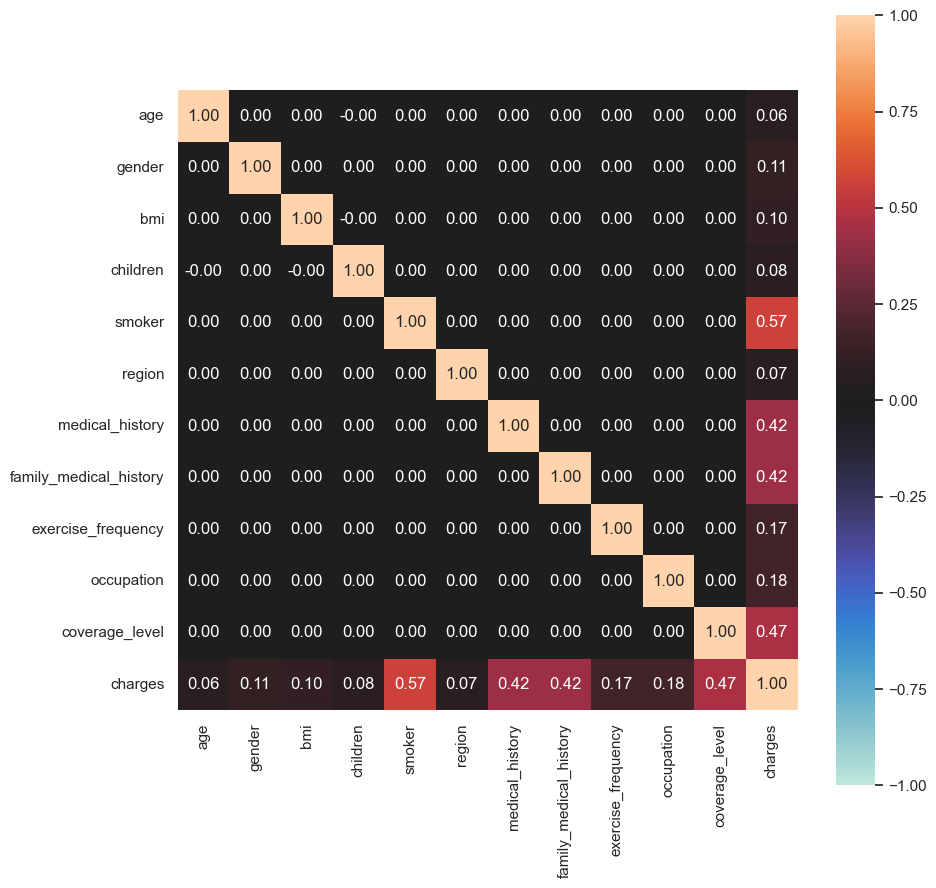

In [85]:
corr = associations(dados, figsize=(10,10))

### Treinamento do KMeans e criação dos clusters

In [86]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)

kmeans.fit(dados_dummy)

cluster_labels = kmeans.labels_

In [87]:
dados_dummy['cluster'] = cluster_labels

cluster_distribution = dados_dummy['cluster'].value_counts().sort_index()
print("Cluster distribution:")
print(cluster_distribution)

Cluster distribution:
cluster
0    114344
1    101325
2    144896
3     68928
4     45567
5    140911
6    140017
7     26719
8     85439
9    131854
Name: count, dtype: int64


Criação do dataset de samples

In [88]:
sampled_data = pd.DataFrame()
for cluster_id in range(kmeans.n_clusters):
    cluster_data = dados[cluster_labels == cluster_id]
    # sample de 1% de cada cluster
    sample_size = int(0.01 * len(cluster_data))
    cluster_sample = cluster_data.sample(n=sample_size, random_state=42)
    sampled_data = pd.concat([sampled_data, cluster_sample])

sampled_data.reset_index(drop=True, inplace=True)
sampled_data

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,42,male,20.80,2,no,southwest,Diabetes,High blood pressure,Frequently,Unemployed,Standard,12619.272980
1,54,female,41.10,0,no,northeast,Heart disease,NaN,Never,Unemployed,Standard,12943.048698
2,41,male,40.70,2,no,southeast,NaN,High blood pressure,Rarely,Blue collar,Standard,12193.736310
3,60,male,25.93,4,yes,southeast,NaN,High blood pressure,Never,Unemployed,Basic,12473.601881
4,47,female,31.55,2,no,southwest,NaN,Heart disease,Never,Unemployed,Standard,12466.618677
...,...,...,...,...,...,...,...,...,...,...,...,...
9991,60,male,30.76,4,yes,northwest,High blood pressure,NaN,Never,Blue collar,Premium,19486.772623
9992,31,male,42.19,0,yes,northwest,NaN,Diabetes,Frequently,Unemployed,Premium,20411.831558
9993,22,male,35.95,0,yes,northwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,18845.884346
9994,39,female,46.82,1,yes,northeast,High blood pressure,Diabetes,Frequently,White collar,Standard,20148.665770


Prova real de que os samples representam igualmente a base original.

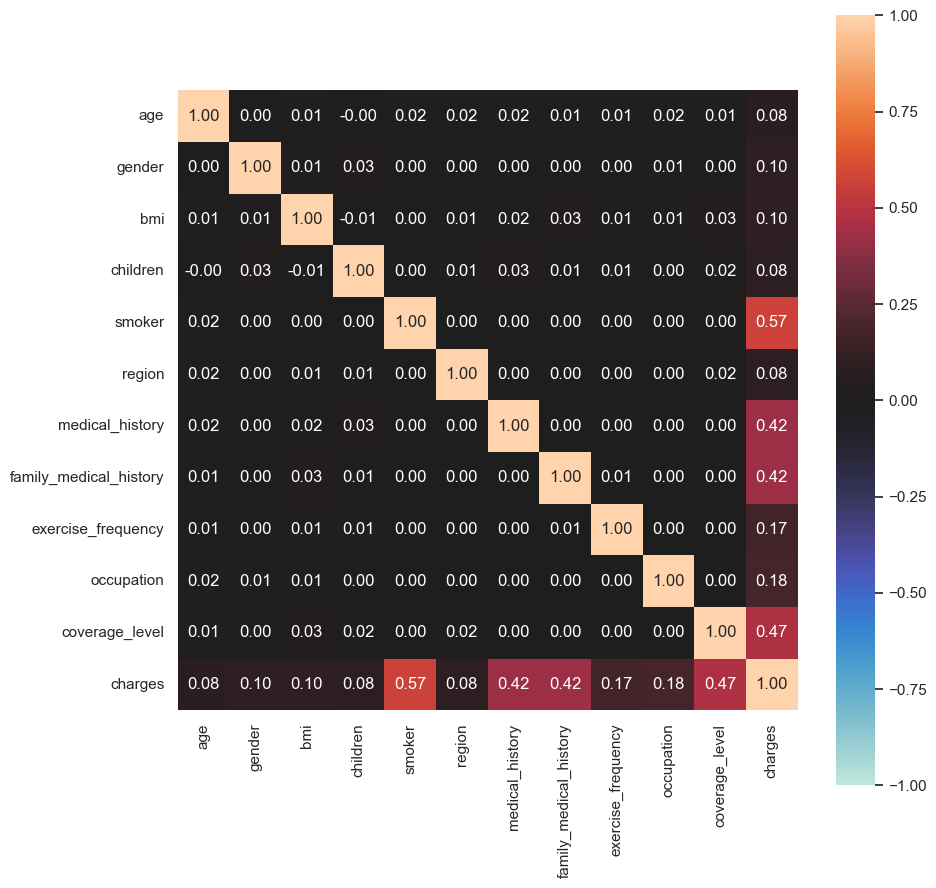

In [89]:
corr = associations(sampled_data, figsize=(10,10))

### Pergunta 1
Baseado na matriz de correlação, smoker é a variável mais representativa dos dados.
Qual é a relação do hábito de fumar com o aumento do valor pago no plano de saúde?

#### Resposta
Podemos plotar um gráfico para validar se ela tem alguma relação com o aumento do charges.

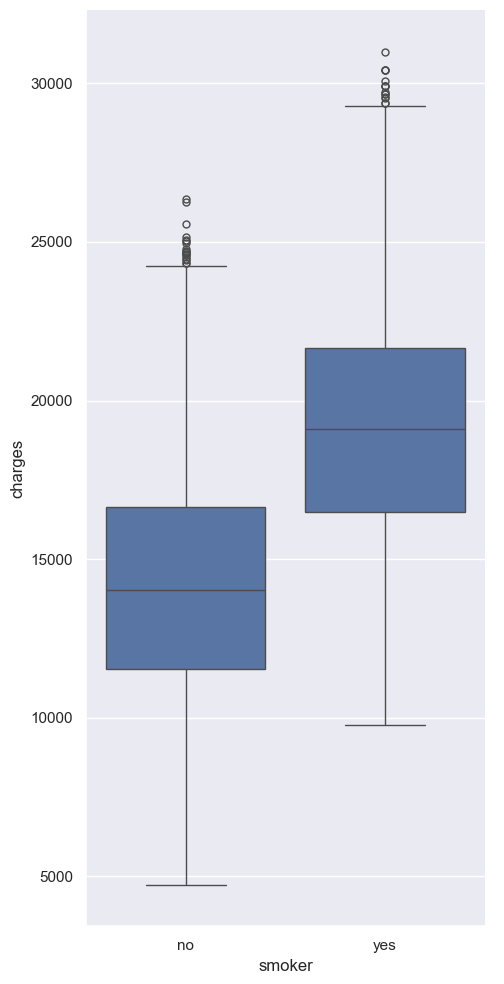

In [90]:
sns.catplot(data=sampled_data, x="smoker", y="charges", height=10, aspect=.5, kind="box")

Conclusão: Sim, de acordo com o boxplot, os fumantes, em média, tem charges maiores.

### Pergunta 2

Qual valor em média que os fumantes pagam a mais do que os não fumantes no plano de saúde?

In [91]:
media_fumantes = sampled_data.loc[sampled_data['smoker'] == "yes"]['charges'].mean()
media_nao_fumantes = sampled_data.loc[sampled_data['smoker'] == "no"]['charges'].mean()
diferenca = media_fumantes - media_nao_fumantes

print(f"Diferença: {diferenca}")

Diferença: 5013.7797989332375


Resposta: Em média fumantes pagam $5013.77 a mais do que não fumantes.

### Pergunta 3
Conforme visto na análise exploratória, a coluna 'coverage_level' apresenta os níveis de cobertura do plano de saúde. Qual é a relação entre os tipos de planos e os valores cobrados?

#### Resposta

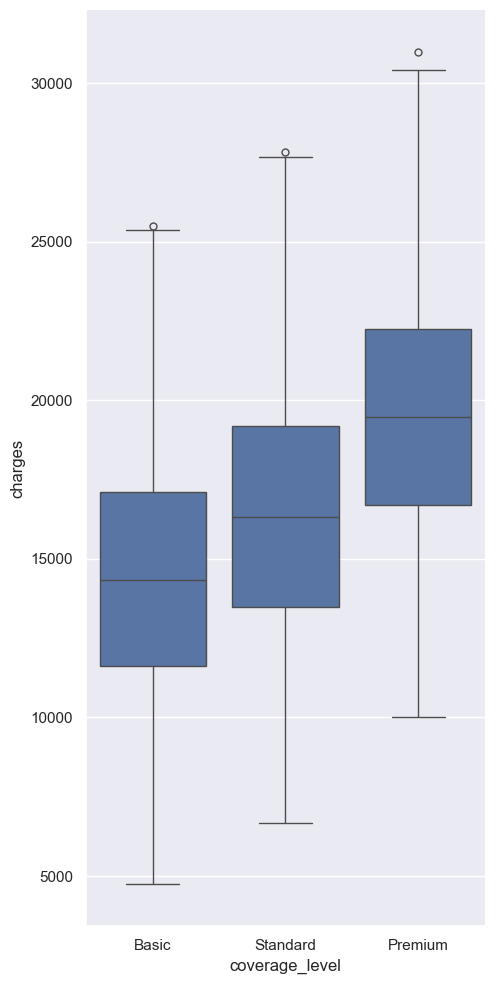

In [92]:
sns.catplot(data=sampled_data, x="coverage_level", y="charges", height=10, aspect=.5, kind="box", order=["Basic", "Standard", "Premium"])

Conclusão: Sim, os níveis de cobertura acompanham os valores cobrados.

### Pergunta 4

Qual doença do histórico pessoal e familiar tem mais impacto no valor cobrado?

#### Resposta

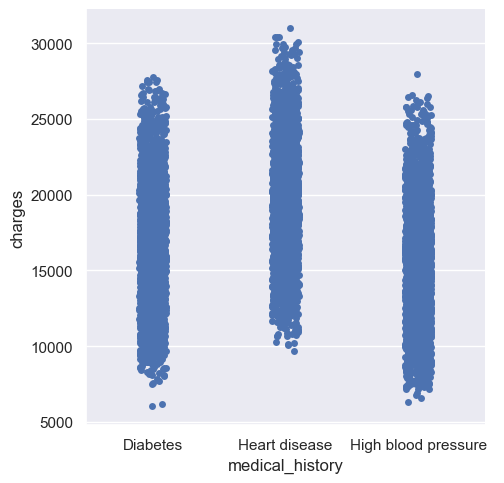

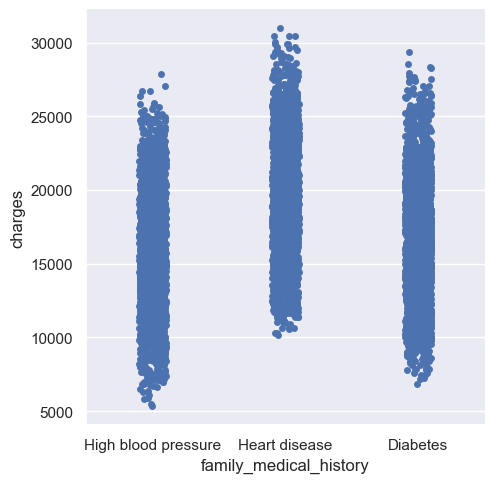

In [93]:
sns.catplot(data=sampled_data, x="medical_history", y="charges")
sns.catplot(data=sampled_data, x="family_medical_history", y="charges")

Conclusão: as doenças que tem mais impacto em ambos os casos, em ordem, são:
1. Heart Disease (Doença cardíaca)
2. Diabetes
3. High blood pressure (Hipertensão)

# Treinamento dos modelos

## Transformação das amostras

Para iniciar o treinamento do modelo, precisamos categorizar e tratar os dados nulos da amostra que utilizaremos.

In [94]:
categorical_cols = identify_nominal_columns(sampled_data)
sampled_dummy_data = pd.get_dummies(sampled_data, columns=categorical_cols, dtype=int)

## Separar dados de treino e teste

Nesta etapa, definimos nosso eixo y com o target('charges') e decidimos utilizar a proporção 80/20 para separar as bases de treino e teste.

In [95]:
from sklearn.model_selection import train_test_split

X = sampled_dummy_data.drop(columns=['charges'])
y = sampled_dummy_data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Original: {sampled_dummy_data.shape}")
print(f"Training: {X_train.shape}, {y_train.shape}")
print(f"Testing: {X_test.shape}, {y_test.shape}")

Original: (9996, 29)
Training: (7996, 28), (7996,)
Testing: (2000, 28), (2000,)


## Treinamento e teste dos modelos

Escolhemos os modelos Ridge e XGBRegressor para predição e em cada um deles utilizamos a classe `GridSearchCV` para otimização dos hiperparâmetros.

Nas próximas etapas iremos treinar os modelos e utilizar as métricas RMSE para verificar o erro médio e o R2 Score para verificar a linearidade das previsões.

In [96]:
# DataFrame de resultados
results_df = pd.DataFrame({ "Model": [], "RMSE": [], "R2": []})

def add_result(model, rmse, r2):
    results_df.loc[len(results_df)] = { "Model": model, "RMSE": rmse, "R2": r2 }

##### Ridge

In [97]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import root_mean_squared_error, r2_score

param_grid = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

ridge_model = Ridge()

ridge_grid = GridSearchCV(ridge_model, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_root_mean_squared_error', refit=True)
ridge_grid.fit(X_train, y_train)


C:\Users\arthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.04169e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\arthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.0071e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\arthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.08906e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\arthu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.05413e-17): result may not be accurate.
  return linalg.solve(

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_root_mean_squared_error')

In [98]:
y_pred = ridge_grid.best_estimator_.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
y_pred_ridge = y_pred

print(f"Ridge Regression Model Performance:")
print(f"R2: {r2}")
print(f"RMSE: {rmse}")

add_result("RidgeRegression", rmse, r2)

Ridge Regression Model Performance:
R2: 0.9957572678622556
RMSE: 288.2098870375283


##### XGBRegressor

In [99]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {'max_depth': [3, 5, 7, 9],
              'learning_rate': [0.4, 0.3, 0.2, 0.1, 0.01, 0.001],
              'n_estimators': [100, 200, 300, 400, 500, 600, 700, 1000]}

xgb_grid = GridSearchCV(xgb_model, param_grid, cv=KFold(n_splits=5, shuffle=True), scoring="neg_root_mean_squared_error", refit=True)

xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    im...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.4, 0.3, 0.2, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          1000]},
             scoring='neg_root_mean_squared_error')

In [100]:
y_pred = xgb_grid.best_estimator_.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("XGB Regression Model Performance")
print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

add_result("XGBRegressor", rmse, r2)

XGB Regression Model Performance
R² Score: 0.9949251265048336
RMSE: 315.2090504743761


# Demonstração dos resultados

In [101]:
results_df.head()

,Model,RMSE,R2
0,RidgeRegression,288.209887,0.995757
1,XGBRegressor,315.209050,0.994925


In [102]:
best_model = results_df.loc[results_df['RMSE'] == results_df['RMSE'].min()]
best_model

,Model,RMSE,R2
0,RidgeRegression,288.209887,0.995757


Após escolher o melhor modelo, utilizamos a técnica SHAP para visualizar qual é a importância de cada coluna na previsão do valor cobrado e plotamos alguns gráficos para melhor compreensão dos resultados.

PermutationExplainer explainer: 2001it [00:33, 42.35it/s]                          
C:\Users\arthu\AppData\Local\Temp\ipykernel_6976\2904417201.py:9: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_ridge, X_test_df, plot_type="bar")


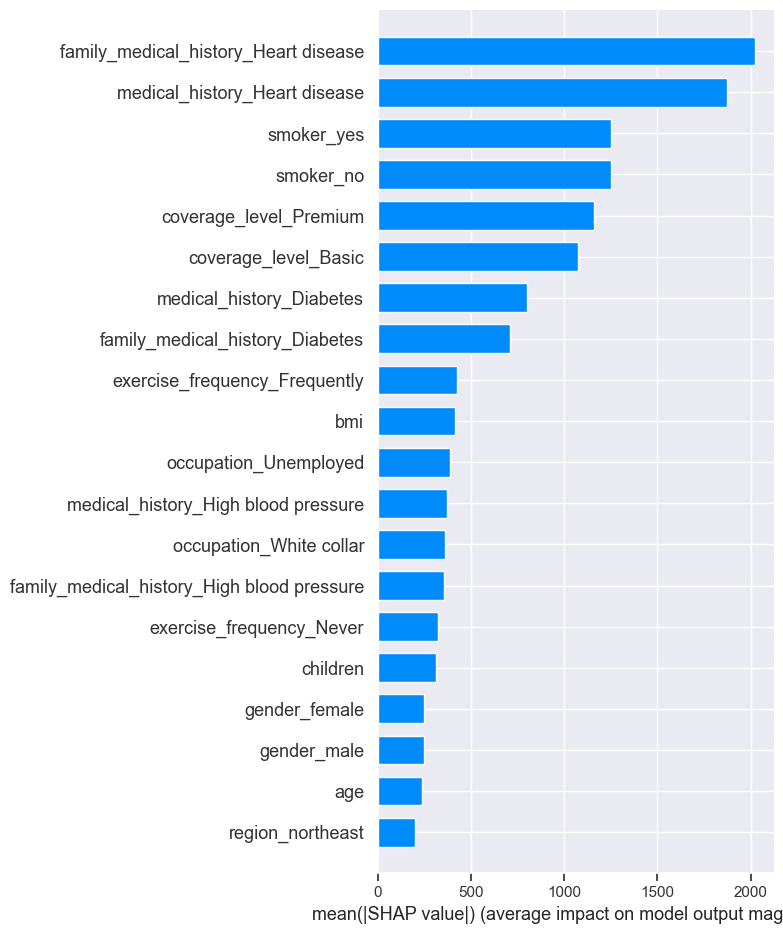

In [103]:
import shap

X_test_df = pd.DataFrame(X_test, columns=X.columns)

# SHAP Ridge
explainer_ridge = shap.Explainer(ridge_grid.best_estimator_.predict, X_test_df)
shap_values_ridge = explainer_ridge(X_test_df)

shap.summary_plot(shap_values_ridge, X_test_df, plot_type="bar")

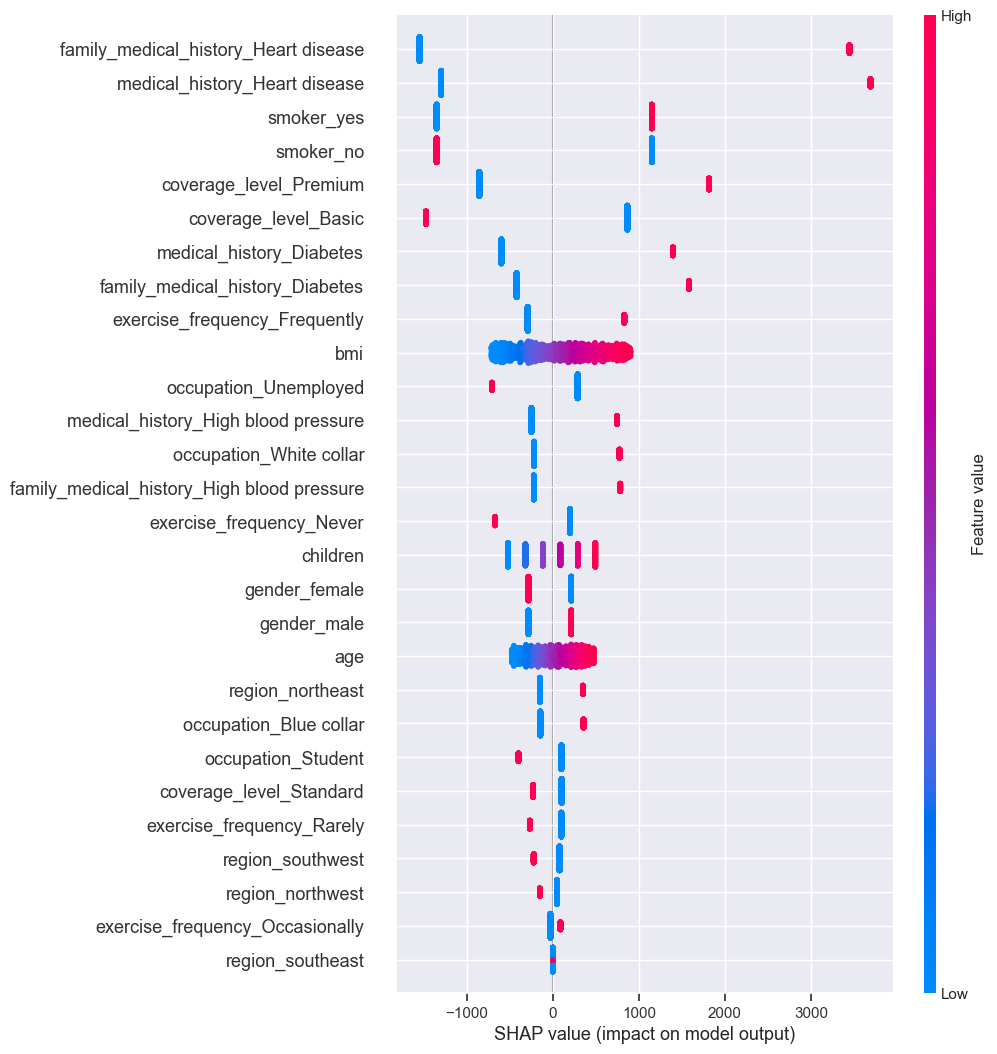

In [104]:
shap.plots.beeswarm(shap_values_ridge, max_display=30)

# Conclusão

Utilizamos um dataset sintético que contém 1 milhão de observações, o que tornou praticamente impossível uma análise em ambiente local. Por isso, optamos por utilizar o modelo não supervisionado KMeans para reduzir o dataset e permitir uma análise gráfica relevante, assim como agilizar o treinamento dos modelos de regressão.

Durante a análise exploratória levantamos algumas hipóteses em relação a quais seriam as features mais importantes para os nossos modelos.
Conseguimos testar nossas hipóteses levantadas a partir da análise dos gráficos e prová-las por meio dos resultados obtidos através dos modelos de regressão utilizados, como o impacto do histórico de doenças cardíacas e o hábito de fumar no valor cobrado pelo plano de saúde.

Através da análise dos gráficos, conseguimos identificar que as features mais importantes para os nossos modelos de regressão são o histórico de doenças cardíacas e o hábito de fumar. Isso foi confirmado pelo treinamento dos modelos de regressão, que mostraram que essas features tinham um impacto significativo no valor cobrado pelo plano de saúde.

Para chegar a essa conclusão sobre os resultados utilizamos o SHAP (SHapley Additive exPlanations), que nos ajuda a entender o impacto de cada feature na previsão do valor cobrado pelo plano de saúde.

<Axes: xlabel='charges'>

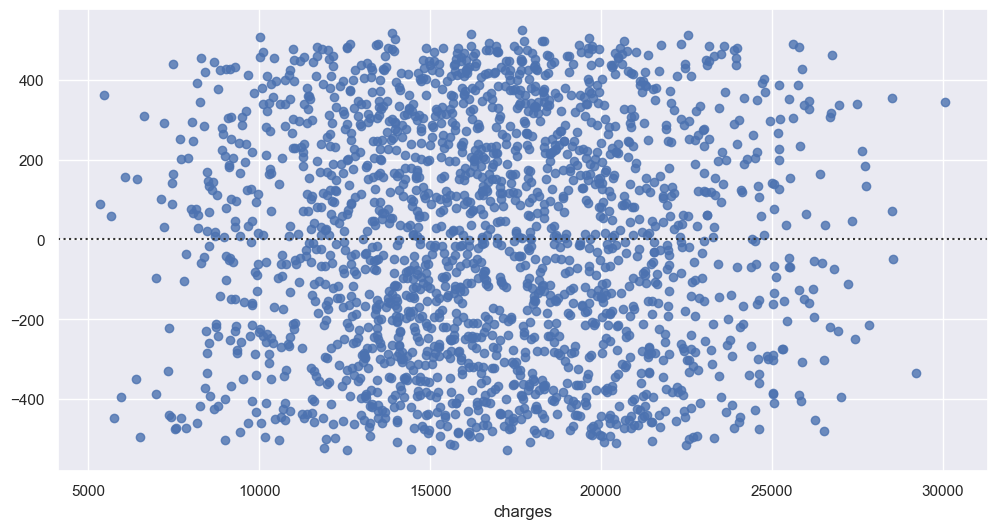

In [105]:
sns.residplot(x=y_test, y=y_pred_ridge)

No gráfico acima podemos observar que os resíduos ficaram na faixa de $500 pra mais ou pra menos, o que indica que o modelo está bem ajustado aos dados e que as previsões estão próximas dos valores reais. Isso é um bom sinal de que o modelo está funcionando bem e que as previsões são confiáveis.

